In [100]:
# taken from 
# https://machinelearningmastery.com/xgboost-for-imbalanced-classification/

In [42]:
from sklearn.datasets import make_classification
from collections import Counter
import numpy as np
from matplotlib import pyplot

In [133]:
# generate randomly high imbalanced data
X,y = make_classification(n_samples= 10000 ,  n_features = 2, n_clusters_per_class=2, n_redundant =0 , weights=[0.99] , flip_y=0)
#X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
#	n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=7)

In [134]:
counter = Counter(y)

In [135]:
print(counter)

Counter({0: 9900, 1: 100})


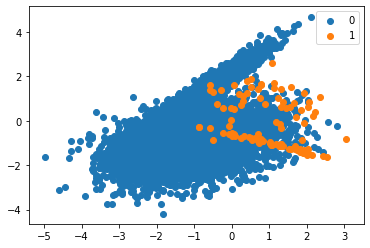

In [136]:
# visualize the class distribution
for label , _ in counter.items():
    inx = np.where( y==label)
    pyplot.scatter(X[inx,0],X[inx,1] , label = str(label))
pyplot.legend()
pyplot.show()

In [137]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

In [138]:
# train model with 10 fold , 3 repeats of XGBoost classifier , no parameter tuning
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats = 3 )
score = cross_val_score(model, X, y , cv=cv, scoring = 'roc_auc')

In [139]:
# the base line auc
print('mean of auc = %.5f' % np.mean(score))

mean of auc = 0.95623


In [140]:
# XGBoost has scale weight to set it up for imbalance data faster convergence 
estimate  = (counter[0] / counter[1])
print (estimate )

99.0


In [141]:
model_imb = XGBClassifier(scale_pos_weight = 99) 

In [161]:
score_imb = cross_val_score(model_imb , X, y , scoring = 'roc_auc' , cv =cv)

In [162]:
# get the aur score for imbalance XGBoost classifier
print('mean of auc of imblance XGBoost %.5f' % np.mean(score_imb))

mean of auc of imblance XGBoost 0.96115


# we can leverage grid search for checkign various weight class

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
weights = [1, 10 , 20 , 25, 50 , 75, 99, 100, 1000]
param_grid = dict(scale_pos_wieght = weights)

In [146]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats =3 , random_state=1)

In [166]:
# run grid search
model = XGBClassifier()

grid = GridSearchCV(estimator = model , param_grid = param_grid, cv =cv , n_jobs = -1 ,  scoring='roc_auc')

In [167]:
result = grid.fit(X,y)

In [168]:
print("best %f with %s "% (result.best_score_ , result.best_params_))

best 0.955579 with {'scale_pos_wieght': 1} 


In [169]:
mean = result.cv_results_['mean_test_score']
std = result.cv_results_['std_test_score']
params = result.cv_results_['params']

In [170]:
for m, s, p in zip(mean,std,params) :
    print("%f %f %s" % (m,s,p))

0.955579 0.034361 {'scale_pos_wieght': 1}
0.955579 0.034361 {'scale_pos_wieght': 10}
0.955579 0.034361 {'scale_pos_wieght': 20}
0.955579 0.034361 {'scale_pos_wieght': 25}
0.955579 0.034361 {'scale_pos_wieght': 50}
0.955579 0.034361 {'scale_pos_wieght': 75}
0.955579 0.034361 {'scale_pos_wieght': 99}
0.955579 0.034361 {'scale_pos_wieght': 100}
0.955579 0.034361 {'scale_pos_wieght': 1000}


In [171]:
# grid search positive class weights with xgboost for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=7)
# define model
model = XGBClassifier()
# define grid
weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.960155 using {'scale_pos_weight': 1000}
0.953721 (0.035950) with: {'scale_pos_weight': 1}
0.958254 (0.028362) with: {'scale_pos_weight': 10}
0.957892 (0.027283) with: {'scale_pos_weight': 25}
0.959157 (0.027430) with: {'scale_pos_weight': 50}
0.959241 (0.028015) with: {'scale_pos_weight': 75}
0.959305 (0.028286) with: {'scale_pos_weight': 99}
0.959505 (0.028213) with: {'scale_pos_weight': 100}
0.960155 (0.028721) with: {'scale_pos_weight': 1000}
